# Final Project Phase 1

#### Download the data and load it into Python
***

In [341]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [342]:
#Load the data and print the head to get an idea of the data
df = pd.read_csv('https://raw.githubusercontent.com/INFO590-Pythoneers/Final-Project-Repo/master/Phase%201/Data/BreastCancerWisconsin.csv')
print(df.head())

       Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
0  1000025   5   1   1   1   2   1   3   1    1      2
1  1002945   5   4   4   5   7  10   3   2    1      2
2  1015425   3   1   1   1   2   2   3   1    1      2
3  1016277   6   8   8   1   3   4   3   7    1      2
4  1017023   4   1   1   3   2   1   3   1    1      2


#### Impute missing values
***

In [343]:
#Check to see if any columns contain any question marks
df.isin(['?']).any()

Scn      False
A2       False
A3       False
A4       False
A5       False
A6       False
A7        True
A8       False
A9       False
A10      False
CLASS    False
dtype: bool

In [344]:
#Update all values of ? to NaN and print how many of them were converted
A7 = df['A7'];
df['A7'] = df['A7'].replace("?", np.NaN)
df['A7'] = pd.to_numeric(df['A7'])
count = sum(pd.isnull(df['A7']))
print(str(count) + " of A7 is NaN.")


16 of A7 is NaN.


In [345]:
#Calculate the mean and replace all NaN values with it
mean = df['A7'].mean(skipna = True)
print("The mean of column A7 is " + str(mean))


The mean of column A7 is 3.5446559297218156


In [346]:
#Replace all NaN values with the mean and print out the count to confirm they have been replaced
df = df.fillna(mean)
count = sum(pd.isnull(df['A7']))
print(str(count) + " of A7 is NaN.")

0 of A7 is NaN.


#### Plot basic graphs 
*** 

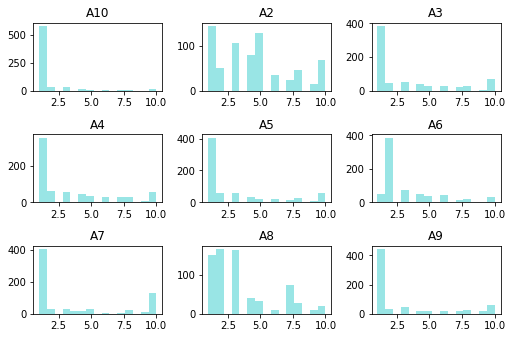

In [347]:
#Slice dataframe to include only columns A2-A10.
dfslice=df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
#Plot 9 histograms, one for each column of dfslice: 
dfslice.hist(grid=False, bins=15, color='c', alpha=0.4)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

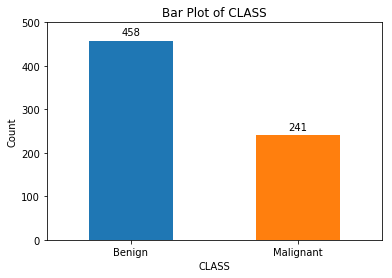

In [348]:
#Bar plot for CLASS 
ax = df['CLASS'].value_counts().plot(kind= 'bar', title= 'Bar Plot of CLASS', rot=0)
ax.set_ylim(0,500)
ax.set_xlabel("CLASS")
ax.set_xticklabels({'Benign','Malignant'})
ax.set_ylabel("Count")
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

Correlation: 0.907


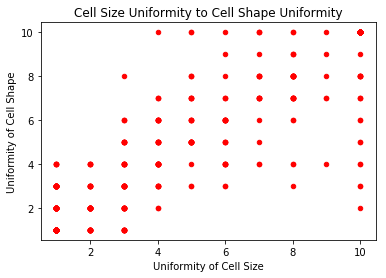

In [349]:
#Scatter plot to see relationship of cell size uniformity to cell shape uniformity

ax = df.plot(kind='scatter', x='A3', y='A4', color='red', title="Cell Size Uniformity to Cell Shape Uniformity")
ax.set_xlabel("Uniformity of Cell Size")
ax.set_ylabel("Uniformity of Cell Shape")

correlation = np.corrcoef(df['A3'], df['A4'])[0][1]
print("Correlation: {0:.3f}".format(correlation))

There appears to be high correlation between cell size uniformity and cell shape uniformity.

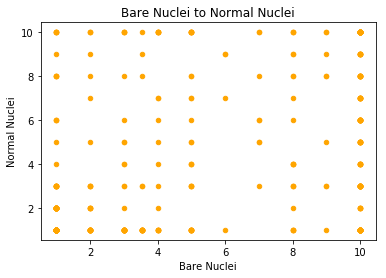

In [350]:
#Scatter plot to see relationship of bare nuclei to normal nuclei

ax = df.plot(kind='scatter', x='A7', y='A9', color='orange', title="Bare Nuclei to Normal Nuclei")
ax.set_xlabel("Bare Nuclei")
ax.set_ylabel("Normal Nuclei")
print()

There is no strong correlation between the bare nuclei and normal nuclei

#### Compute data statistics
***

In [351]:
#Print out summary statistcs of the dataframe
df.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [352]:
#Print the number of rows and number of columns
num_rows, num_cols = df.shape
print("There are " + str(num_cols) + " columns and " + str(num_rows) + " rows.")

There are 11 columns and 699 rows.


In [353]:
#Report the number of unique ids
unique_count = df['Scn'].unique().size
print("There are " + str(unique_count) + " unique ids in the Scn column")

There are 645 unique ids in the Scn column


#### Mean, Median, Standard Deviation, Variance, and Coefficient of Variation Summary
***

In [354]:
#Create a label dictionary
labelDictionary = {
    "A2": "Clump Thickness",
    "A3": "Uniformity of Cell Size",
    "A4": "Uniformity of Cell Shape",
    "A5": "Marginal Adhesion",
    "A6": "Single Epithelial Cell Size",
    "A7": "Bare Nuclei",
    "A8": "Bland Chromatin",
    "A9": "Normal Nuclei",
    "A10": "Mitoses",
}
# Store variance, coefficient of variation for future use
varDictionary = {} 
coefDictionary = {}

# Calculate the mean, median, standard and variance for A2 to A10
for index in df.iloc[:,1:10]:
    print(labelDictionary[index])
    print("********************************************")
    series = df[index]
    mean = series.mean()
    median = series.median()
    std = series.std()
    variance = series.var()
    varDictionary [labelDictionary[index]] = variance
    coef = std/mean
    coefDictionary [labelDictionary[index]] = coef
    print("Mean: {0:.3f}".format(mean))
    print("Median: {0:.0f}".format(median))
    print("Standard Deviation: {0:.3f}".format(std))
    print("Variance: {0:.3f}".format(variance))
    print("Coefficient of Variance: {0:.3f}".format(coef))
    print()

    

Clump Thickness
********************************************
Mean: 4.418
Median: 4
Standard Deviation: 2.816
Variance: 7.928
Coefficient of Variance: 0.637

Uniformity of Cell Size
********************************************
Mean: 3.134
Median: 1
Standard Deviation: 3.051
Variance: 9.311
Coefficient of Variance: 0.974

Uniformity of Cell Shape
********************************************
Mean: 3.207
Median: 1
Standard Deviation: 2.972
Variance: 8.832
Coefficient of Variance: 0.927

Marginal Adhesion
********************************************
Mean: 2.807
Median: 1
Standard Deviation: 2.855
Variance: 8.153
Coefficient of Variance: 1.017

Single Epithelial Cell Size
********************************************
Mean: 3.216
Median: 2
Standard Deviation: 2.214
Variance: 4.903
Coefficient of Variance: 0.689

Bare Nuclei
********************************************
Mean: 3.545
Median: 1
Standard Deviation: 3.602
Variance: 12.973
Coefficient of Variance: 1.016

Bland Chromatin
**************

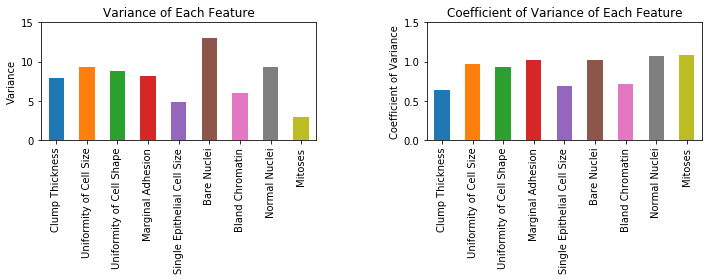

In [355]:
# Display bar chart of variance for each feature
f, ax = plt.subplots(ncols=2, figsize=(10,4))
varSeries = pd.Series(varDictionary)
varSeries.plot(kind= 'bar', title= 'Variance of Each Feature', ax=ax[0])
ax[0].set_ylabel("Variance")
ax[0].set_ylim(0,15)

coefSeries = pd.Series(coefDictionary)
coefSeries.plot(kind= 'bar', title= 'Coefficient of Variance of Each Feature', ax=ax[1])
ax[1].set_ylabel("Coefficient of Variance")
ax[1].set_ylim(0,1.5)

plt.tight_layout()
plt.subplots_adjust(wspace=.40)

#### Summary Report
"Bare Nuclei", "Normal Nuclei", "Uniformity of Cell Size", Uniformity of Cell Shape", "Clump Thickness" and "Marginal Adhesion" all have relatively higher variances compared to "Single Epithelial Cell Size", "Bland Nuclei" and "Mitosis".  This higher variation will result in a greater weight for those features and will result it those feature's overly fluencing the results in a cluster analysis. It would benefit to standardize the features so that all features can be given an equal weight during cluster analysis.

Although all the features in this study are measured on the same scale (1 to 10), they have different means and variation across those means. Another way to look at the variation is the coefficient of variance, also known as the relative standard deviation.  It is a standardized measure of distribution and is defined by the ratio of the standard deviation to the mean.  This is particularly useful for variables that are not measured on the same scale or units. As a rule of thumb, coefficient of variance values of one or greater tend to denote high variance and lower than one denote low variance. Based on the coefficient of variance graph above, "Marginal Adhesion", "Bare Nuclei", "Normal Nuclei" and "Mitoses" all have higher relative variation to their respective means.

The correlation coefficient between "Uniformity of Cell Size" and "Uniformity of Cell Shape" is 0.907 which is a strong positive correlation. Correlation coefficient is defined as the correlation or statistical relationship between two variables. The correlation coefficent values range from +1 to -1.   When the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation. When the value is zero there is no correlation, and all other values between ± 0.49 and zero are medium to low correlation. The strong correlation between "Uniformity of Cell Size" and "Uniformity of Cell Shape" could deonate a possible intrinsic dimension for dimenson reduction when performing our Principal Component Analysis.

The histograms show that for cell characteristics A3-A7, A9, and A10, the majority of sample IDs are quite low (under 2.5) and do not show a normal distribution. This skew will be an important facet of the data to note before other statistics are performed, and may introduce statistical outliers. In future exploration of this data, correlations between the values (potentially standardized, as discussed above) of these sample IDs and their 'class' will lead to a better understanding of what cellular characteristics determine the status of a breast tumor as benign or malignant. This could lead to useful advances in machine vision and other visual tools for diagnosis and prompt treatment.
